In [0]:
import os
from Audio_reader import readtf
from getman import getmanlist
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D,SpatialDropout2D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers
from sklearn.metrics import confusion_matrix

In [0]:
def check(y):
    if 74 in y:
        return 0 
    #male
    if 1 in y:
        return 1
    #female
    if 2 in y:
        return 2
    #child
    if 3 in y:
        return 3
    return 0

In [0]:
X = []
Y = [] 
with open("X_list_eval.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list_eval.pickle","rb") as xf:
    Y.extend(pickle.load(xf))
      
with open("X_list.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list.pickle","rb") as xf:
    Y.extend(pickle.load(xf))

X=np.array(X)
Y=np.array(Y)  

X = X.astype('float32')    
X /= 255



In [0]:
learning_rate=0.001
decay=0.000001
momentum=0.99
dropout_rate = 0.35

rglrzr = regularizers.l2(0.0015)

In [47]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=dropout_rate))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(rate=dropout_rate))



model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(256, (1, 1), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=dropout_rate))


model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(rate=dropout_rate))



model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (1, 1), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=dropout_rate))




model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 10, 128, 64)       640       
_________________________________________________________________
batch_normalization_105 (Bat (None, 10, 128, 64)       256       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 10, 128, 64)       36928     
_________________________________________________________________
batch_normalization_106 (Bat (None, 10, 128, 64)       256       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 64, 64)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 64, 64)         0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 5, 64, 128)        73856     
__________

In [0]:

optimizer = optimizers.SGD(lr=learning_rate,momentum=momentum,decay=decay)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

In [0]:
cb=[]

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='acc', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

#cb.append(reduce_lr)
cb.append(early_stopping)

In [49]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=200,
          verbose=2,
          callbacks=cb,
          validation_split=0.3,
          shuffle=True)

Train on 443 samples, validate on 190 samples
Epoch 1/200
 - 9s - loss: 1.7272 - categorical_accuracy: 0.4379 - val_loss: 6.7866 - val_categorical_accuracy: 0.5789
Epoch 2/200


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: val_loss,val_categorical_accuracy,loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 1s - loss: 1.3069 - categorical_accuracy: 0.4786 - val_loss: 12.7869 - val_categorical_accuracy: 0.1947
Epoch 3/200
 - 1s - loss: 1.0151 - categorical_accuracy: 0.5350 - val_loss: 12.9794 - val_categorical_accuracy: 0.1947
Epoch 4/200
 - 1s - loss: 0.9323 - categorical_accuracy: 0.5937 - val_loss: 12.2946 - val_categorical_accuracy: 0.2158
Epoch 5/200
 - 1s - loss: 0.9268 - categorical_accuracy: 0.5914 - val_loss: 9.0595 - val_categorical_accuracy: 0.3316
Epoch 6/200
 - 1s - loss: 0.8969 - categorical_accuracy: 0.5869 - val_loss: 8.1285 - val_categorical_accuracy: 0.3158
Epoch 7/200
 - 1s - loss: 0.9213 - categorical_accuracy: 0.5959 - val_loss: 6.0622 - val_categorical_accuracy: 0.5842
Epoch 8/200
 - 1s - loss: 0.8835 - categorical_accuracy: 0.6117 - val_loss: 12.9798 - val_categorical_accuracy: 0.1947
Epoch 9/200
 - 1s - loss: 0.8665 - categorical_accuracy: 0.6005 - val_loss: 12.9799 - val_categorical_accuracy: 0.1947
Epoch 10/200
 - 1s - loss: 0.8596 - categorical_accuracy: 0.627

KeyboardInterrupt: ignored

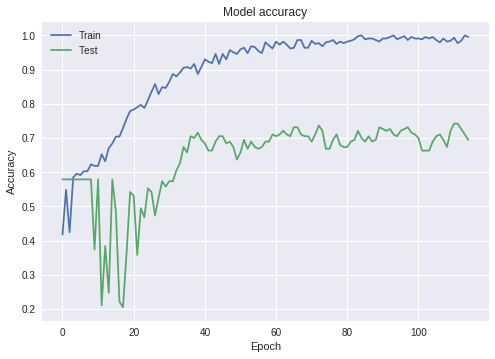

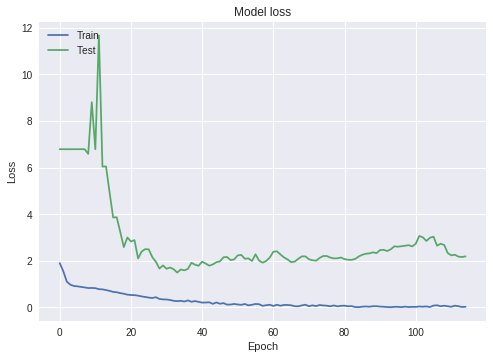

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
y_pred = model.predict(X)
def maxpos(li):
      if (li[1]>li[0]) and (li[1]>li[2])  :
        return 1
      if (li[2]>li[0]) and (li[2]>li[1])  :
        return 2     
      return 0
y_pre=[maxpos(y) for y in y_pred]
y_tes=[maxpos(y) for y in Y]

In [52]:
confusion_matrix(y_true=y_tes,y_pred=y_pre)

array([[101,   8,  16],
       [  3, 120,  13],
       [  2,  24, 346]])

In [0]:
model.save('VGG-ish_73.model')